# Обучение без учителя


## Подготовка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Analysis/lab6/Obesity.csv')
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0.0,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,1.0
1,21.0,0.0,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,23.0,1.0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0
3,27.0,1.0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,2.0
4,22.0,1.0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,2.0


In [ ]:
vals = dataset['NObeyesdad'].unique()
vals

array([1., 2., 0.])

In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = [
    'Age',
    'Gender',
    'Height',
    'Weight',
    'CALC',
    'FAVC',
    'FCVC',
    'NCP',
    'SCC',
    'SMOKE',
    'CH2O',
    'family_history_with_overweight',
    'FAF',
    'TUE',
    'CAEC',
    'MTRANS'
    ]

cols = [
    'Age',
    'Gender',
    'Height',
    'Weight',
    'CALC',
    'FAVC',
    'FCVC',
    'NCP',
    'SCC',
    'SMOKE',
    'CH2O',
    'family_history_with_overweight',
    'FAF',
    'TUE',
    'CAEC',
    'MTRANS'
    ]

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:
X = df
y = dataset["NObeyesdad"].replace(vals, [0, 1, 2])
yvals = dataset["NObeyesdad"]

Когда используются PCA:

Когда скрытые признаки управляют закономерностями в
данных.

Для снижения размерности.

Для визуализации многомерных данных.

Для снижения шума.

В качестве этапа предварительной обработки для повышения производительности других алгоритмов.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

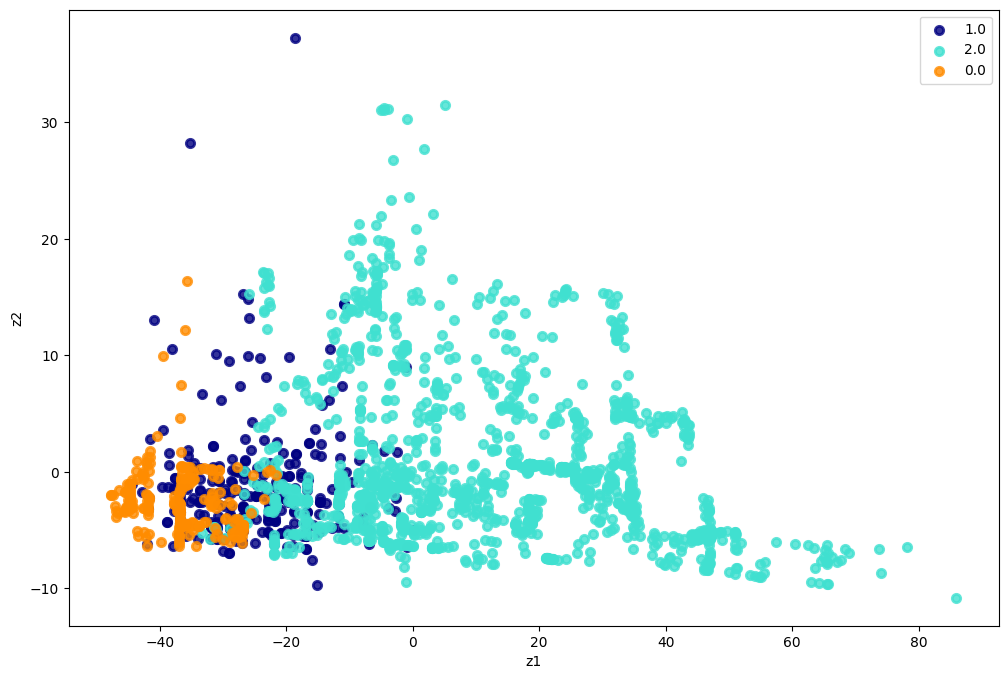

In [ ]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.94063899, 0.05359519])

Можно видеть выше, первые главные компоненты сохраняют 94% дисперсии набора данных, тогда как вторые главные компоненты сохраняют только 5% дисперсии.

Сравнение PCA и ICA

PCA удаляет корреляции, но не зависимость более высокого порядка.

ICA удаляет корреляции и зависимость более высокого порядка.

PCA: некоторые компоненты важнее других (собственные значения).

ICA: все компоненты одинаково важны.

PCA: векторы ортогональны.

Векторы ICA не ортогональны.

In [ ]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

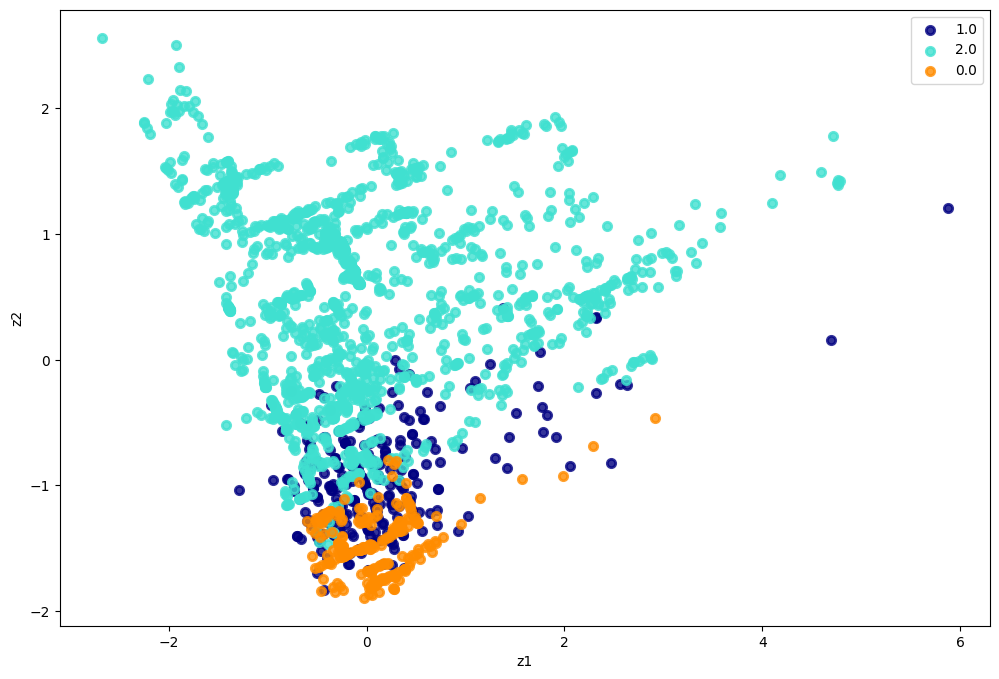

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

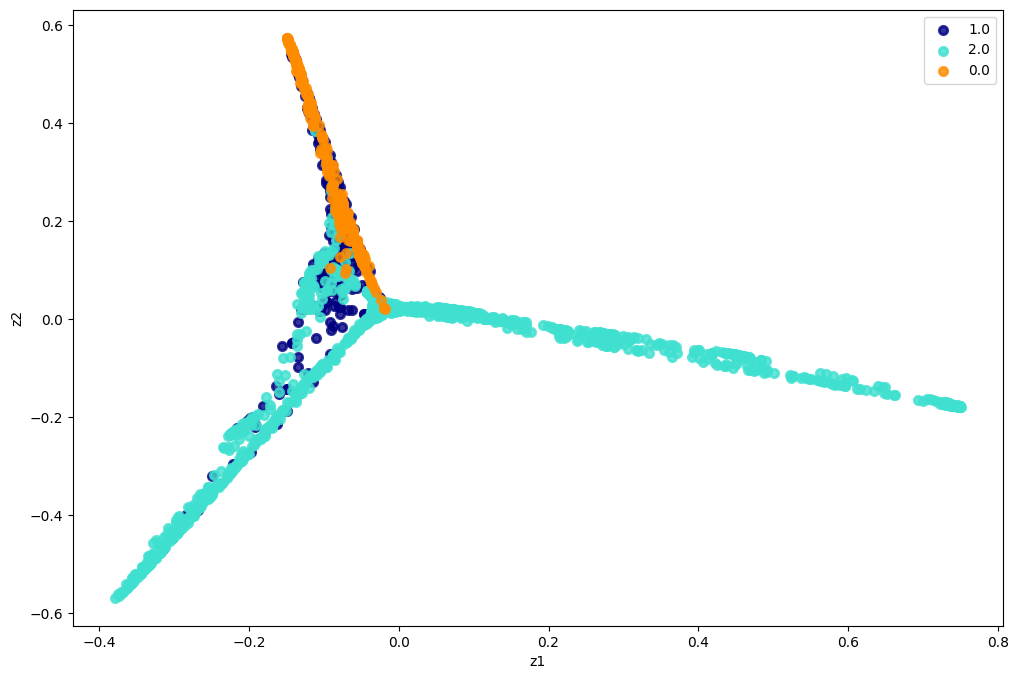

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5)
X_new = tsne.fit_transform(X)

In [ ]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2111, 16)
New Shape of X:  (2111, 2)
Kullback-Leibler divergence after optimization:  0.5787600874900818
No. of iterations:  999


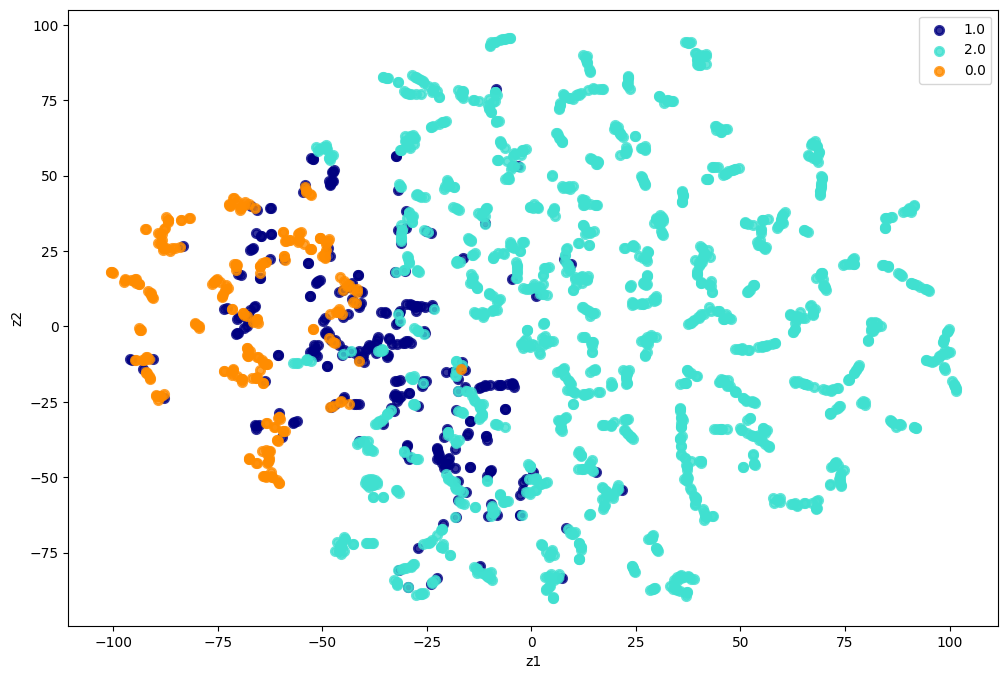

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
## DBSCAN для кластеризации

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 0.08, min_samples = 1)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2030
Estimated no. of noise points: 0
v_measure = 0.1830323088255178


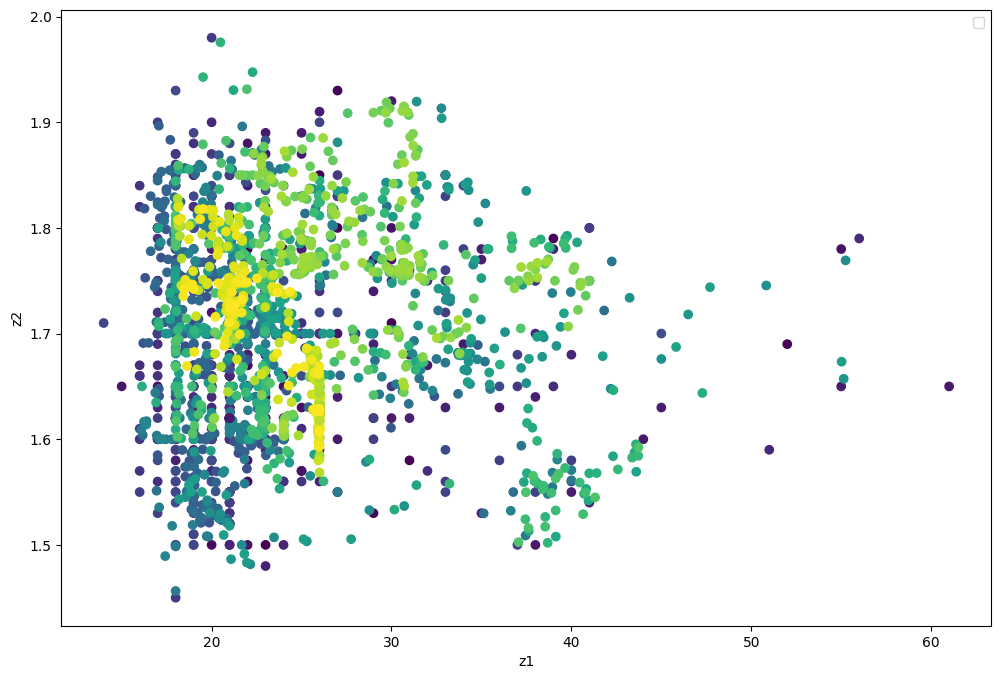

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2
plt.scatter(
        X[cols[0]], X[cols[2]], c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [ ]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

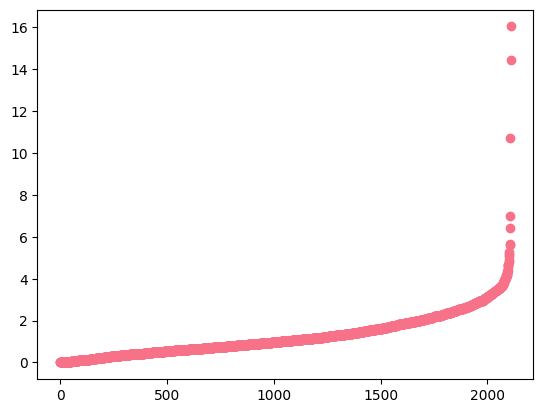

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [ ]:
dbscan = DBSCAN(eps = 3, min_samples = 3)
print(dbscan)

DBSCAN(eps=3, min_samples=3)


In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 16
Estimated no. of noise points: 132
v_measure = 0.09485927438156837


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

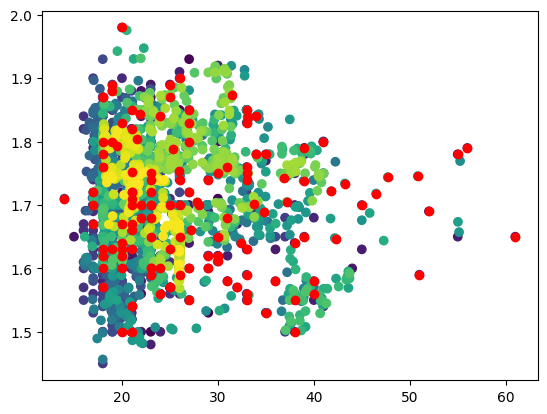

In [ ]:
plt.scatter( X[cols[0]], X[cols[2]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[2]], color='r')
plt.show()